# **Data Visualisation**

## Objectives

Understandung the Europien Housing Matked from 2015 to 2024
View the csv-file from Kaggle 
Make Plots to show see if the Hypothesis are true or not.
Focus on European Countrys for better visualisation comparability and intrest. Also thinking about just looking at germany because the Plots are to messy with more countrys.

## Inputs

in the Folder Data/processed/europe_housing_market.csv from the years 2015-2024

## Outputs

Plots to show the correlations of the varoius factors in the housing market. No File will be generated.

## Additional Comments

Aim: Looking at Europe housing market to determan if and when it was a better time to buy a living space

Buissness Requirements: Are there possible factors thad aid the housing markets affordability and you use these markers to see if you should by now or wait.

Hypothesis: It is better to buy a house in Crisis/Corona Times.

I assuming the european housing market ia independent from the global market. 

When intrest rates go down prices of houses go up.


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\abcde\\Documents\\VS Code Projects\\Europa-Housing-Market\\data_anaylsis_global_housing_market\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\abcde\\Documents\\VS Code Projects\\Europa-Housing-Market\\data_anaylsis_global_housing_market'

# Section 1 - Initialization

Load the Cleaned Dataset

Import all Dependencies

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

# Load Data
df = pd.read_csv("Data/processed/europe_housing_market.csv")

---

# Section 2 - Seaborn

Vizualise the Data to answer the Hypothesis:

1. I assume each housing market in a country is independent.

2. It is better to buy a house in Crisis/Corona Times.

3. When intrest rates go down prices of houses go up.


Hypothesis 1: Independence of housing markets

- I use Pearson correlation Coefficient and see if the prices are indipendent enouth for the practical purpose of this analysis

- $r_{xy} = \frac {s_{xy}}{s_x \times s_y}$

$r_{xy}$ – Korrelationskoeffizient 
$s_{xy}$ – Kovarianz der Variablen x und y 
$s_x$ – Standardabweichung der Variable x 
$s_y$ – Standardabweichung der Variable y 

Correlation near 0 means less correlation so independance

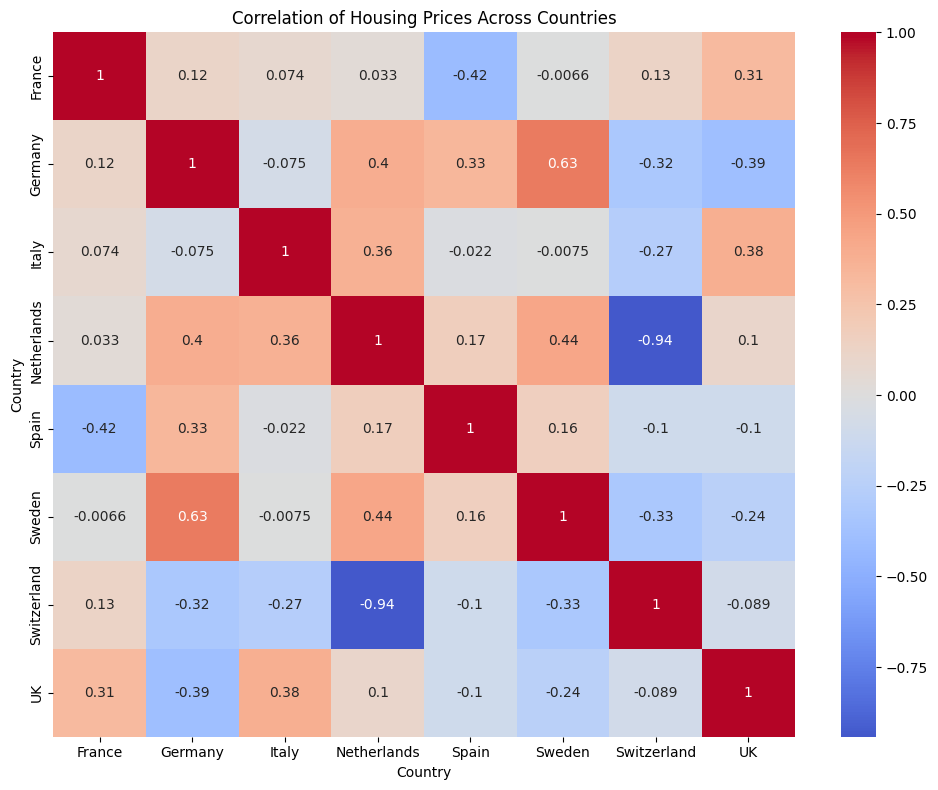

In [5]:
# Pivot so each country is a column and rows are years
hpi_wide = df.pivot(index="Year", columns="Country", values="House Price Index")

# Compute correlation matrix
corr_matrix = hpi_wide.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Housing Prices Across Countries")
plt.tight_layout()
plt.show()

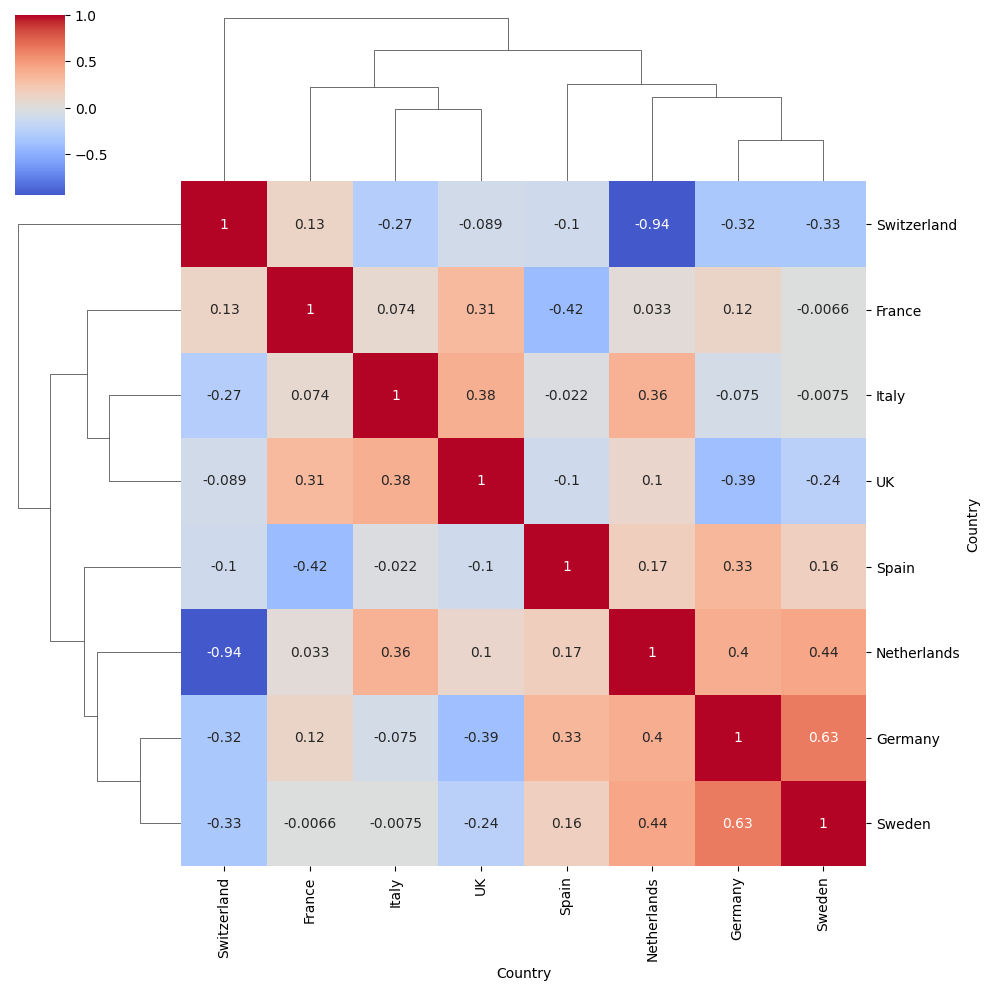

In [6]:
# heatmap with clustering and annotations to see values. 
# Center set to 0 for better visibility.
# colormap for less harsch colors
sns.clustermap(corr_matrix, annot=True, center=0, cmap="coolwarm")

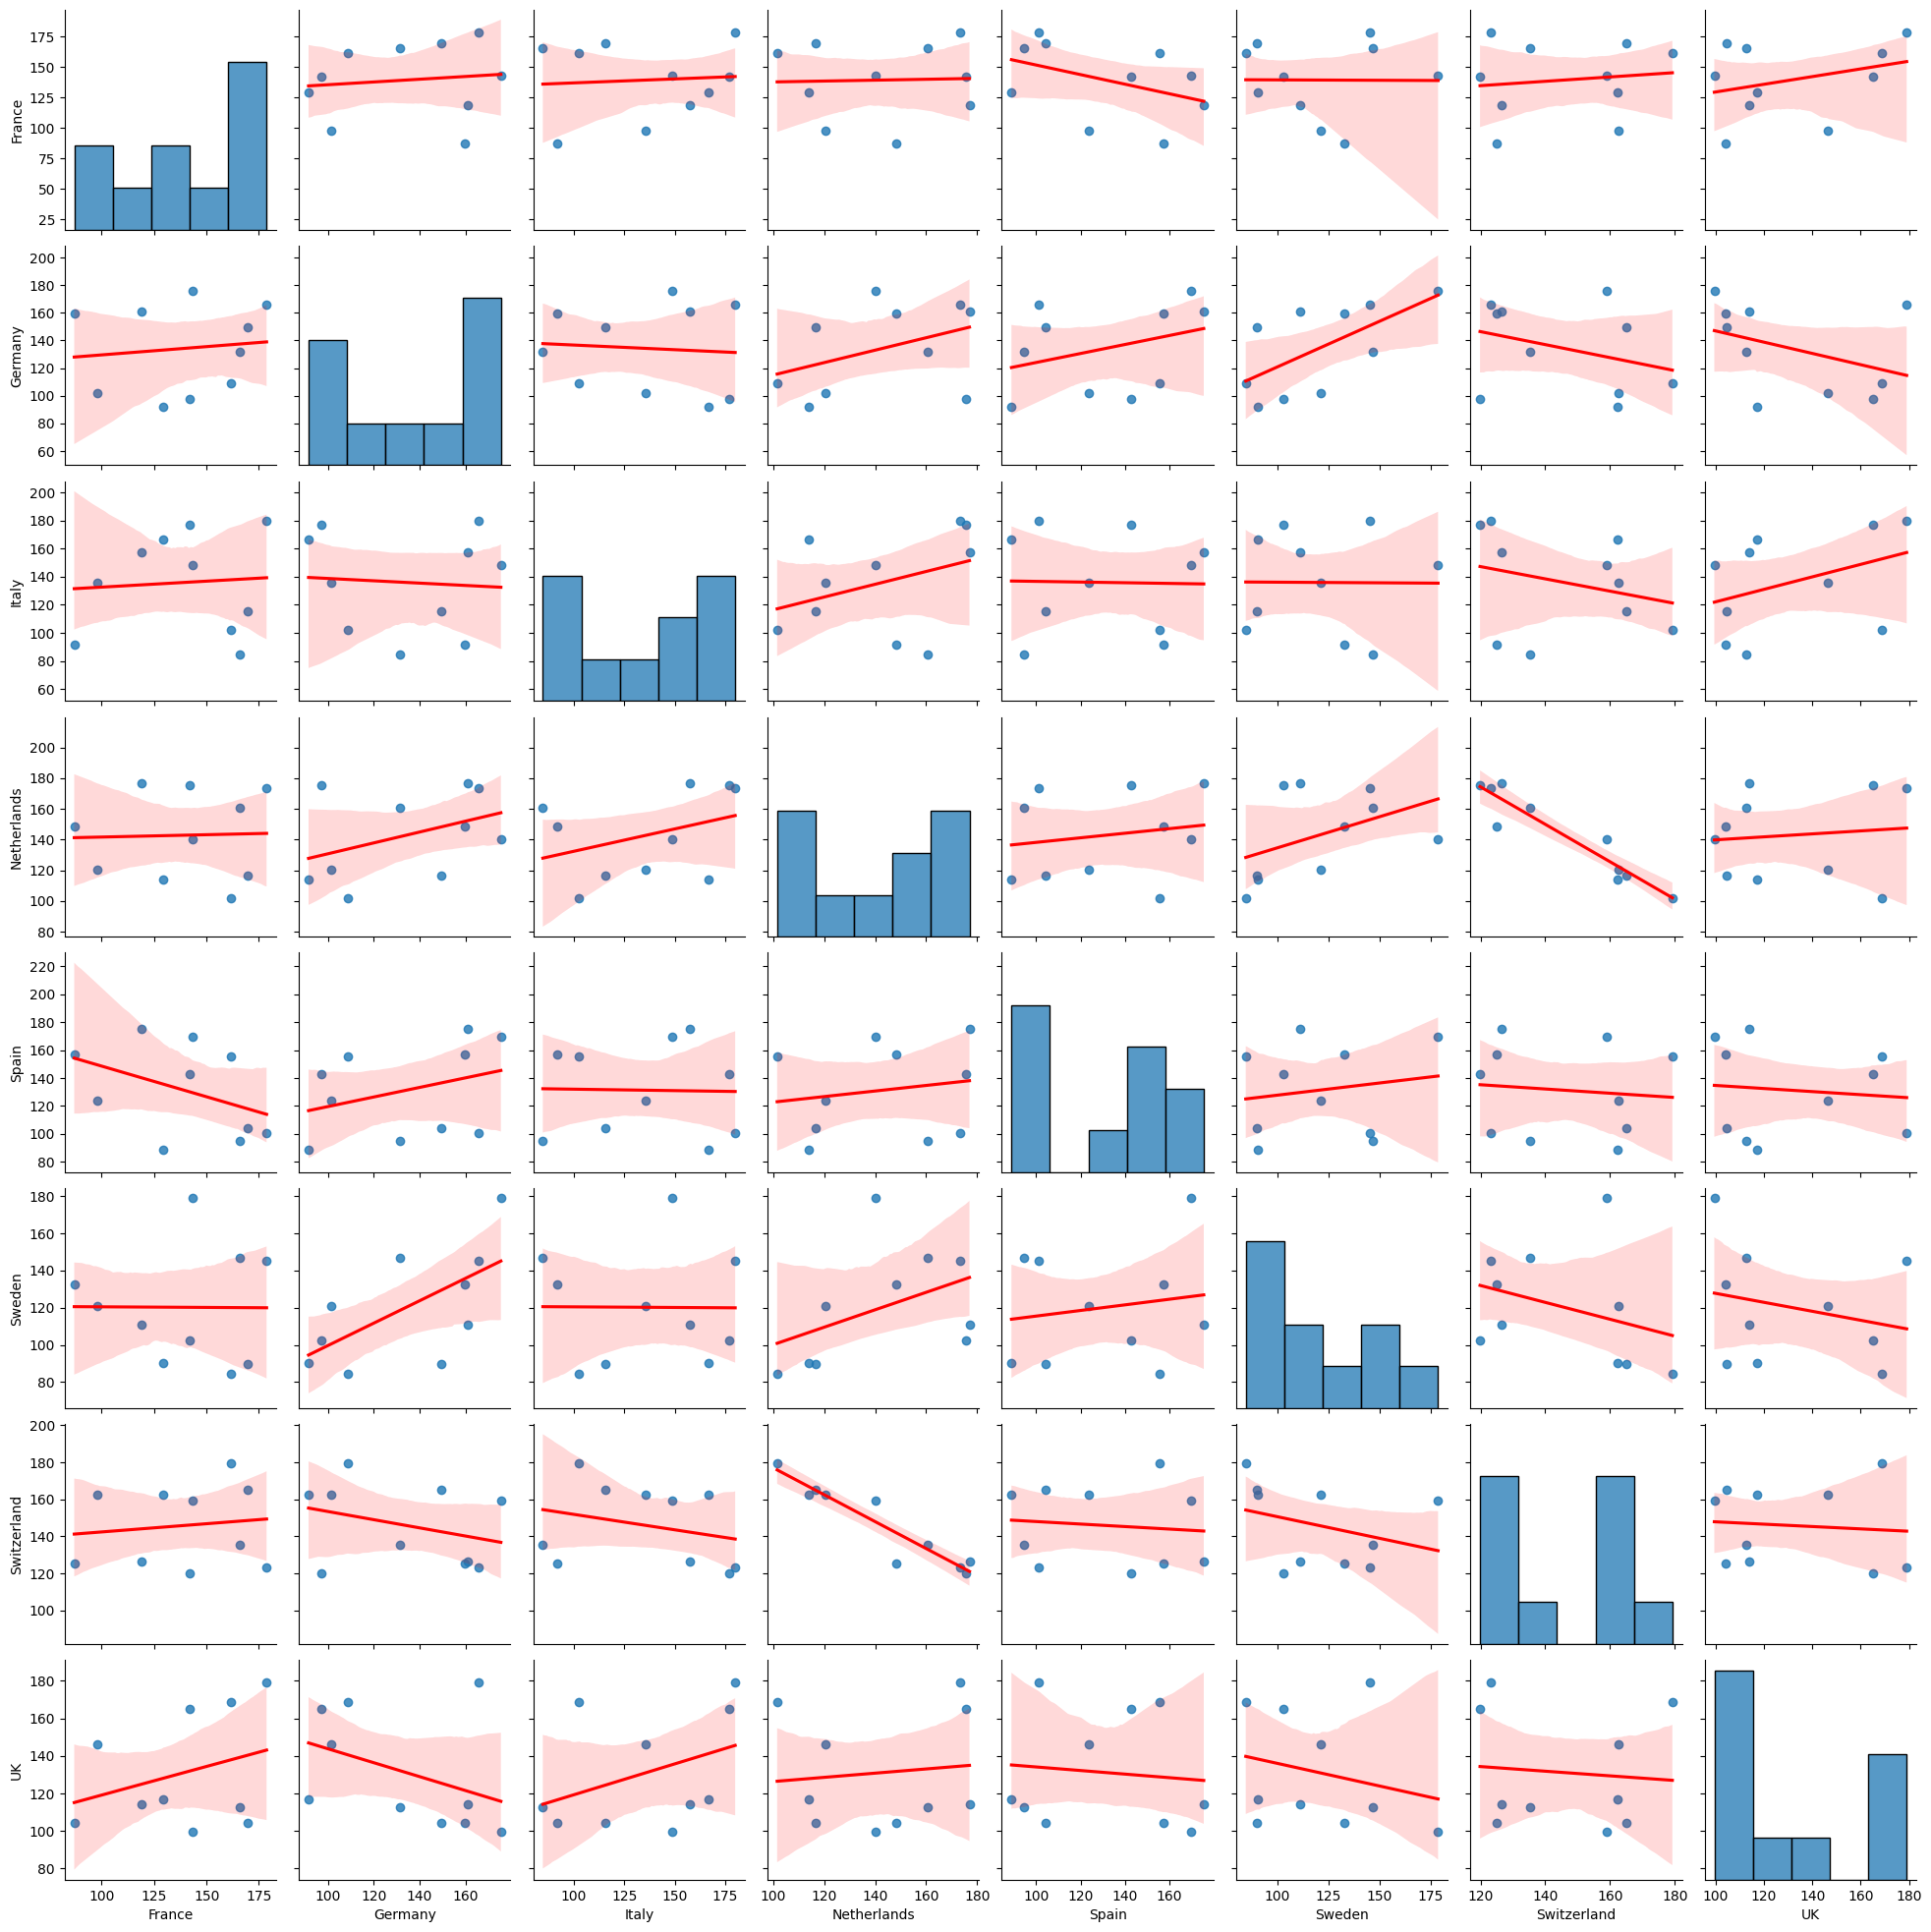

In [7]:
sns.pairplot(hpi_wide, kind="reg", plot_kws={"line_kws": {"color": "red"}})

For the most part, the housing markets appear to be independent in each country.
Most correlation values are close to 0, and the regression lines in the pairwise plots are nearly flat, indicating that price movements are not strongly related between countries.

Two clear exceptions stand out:

Germany–Sweden: correlation of 0.63, showing a moderate positive relationship — their markets tend to move together.

Switzerland–Netherlands: correlation of –0.94, showing an extremely strong negative relationship — when prices rise in one, they tend to fall in the other.

In these two cases, independence between the markets cannot be claimed.


Hypothesis 2 : Crisisis are Opportinitys

Major Crisis from 2015 to 2024

2016 Brexit - Refugee Crisis

2018–2019 trade tensions China - Usa

2020–2022 COVID-19

2022 war & energy crisis

In [7]:
events = [
    dict(name="European refugee crisis",      start=2015, end=2016),
    dict(name="Brexit referendum",            start=2016, end=2016),
    dict(name="US–China trade tensions",      start=2018, end=2019),
    dict(name="COVID-19 pandemic",            start=2020, end=2022),
    dict(name="Russia–Ukraine war / Energy",  start=2022, end=2023),
    dict(name="Post covid Inflation",         start=2023, end=2024),]

I have atually no Idea how I can implement thad into a graph so I will use ChatGPT for thad

In [10]:
fig_facet = px.line(
    df, x="Year", y="House Price Index",
    facet_col="Country", facet_col_wrap=3,  # adjust wrap
    height=800, title="HPI per Country with Events"
)
for ev in events:
    fig_facet.add_vrect(
        x0=ev["start"] - 0.5, x1=ev["end"] + 0.5,
        fillcolor="LightSalmon", opacity=0.17, layer="below", line_width=0
    )
fig_facet.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig_facet.update_yaxes(matches=None)  # independent y-scales per panel (better readability)
fig_facet.update_layout(margin=dict(l=40,r=20,t=60,b=40))
fig_facet.show()

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [11]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)